# **Hello Everyone , this is Yumna Alshalak**
This code is the first task of the spark foundation internship data science and business analytics domain 

# **The Spark Foundation Task1**

### **Importing libraries**

In [52]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
import seaborn as sns

### **Reading data**

In [38]:
#reading data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

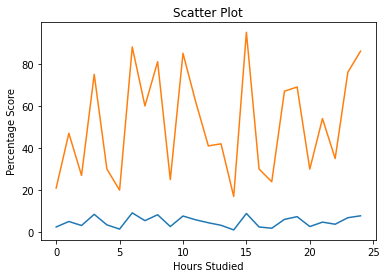

In [50]:
plt.title("Scatter Plot")
plt.plot(s_data['Hours'])
plt.plot(s_data['Scores'])  
# Setting the X and Y labels
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
  
plt.show()

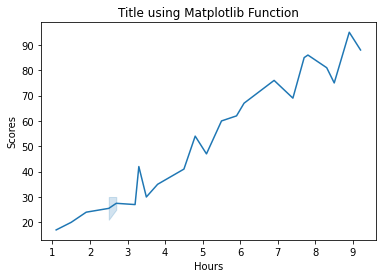

In [53]:
sns.lineplot(x="Hours", y="Scores", data=s_data)
  
# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')
  
plt.show()

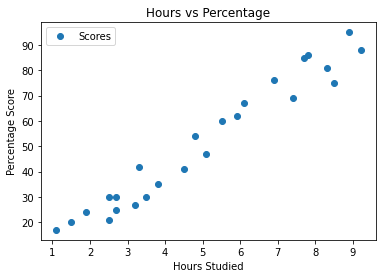

In [39]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [40]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, -1].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [42]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


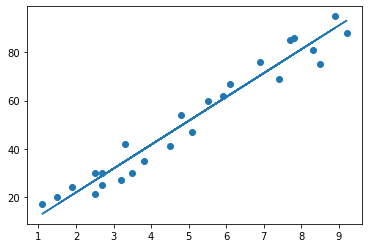

In [43]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [44]:
#making predictions
y_pred = regressor.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
hours = 9.25
hours=np.asarray(hours)
hours=hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [47]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
